In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [24]:
medal_count = pd.read_excel('Medals.xlsx')
medal_count

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


 ## Estimating location

In [25]:
##Mean
medal_count['Total'].mean()

11.612903225806452

In [26]:
#weighteed mean,same mean except you multipy every value by x before adding and dividing by number of instances
np.average(medal_count['Gold'],weights=medal_count['Total'])

14.743518518518519

In [27]:
#Trimmed mean
from scipy.stats import trim_mean

trim_mean(medal_count['Gold'],0.1)

1.96

In [28]:
#Median
medal_count['Total'].median()

4.0

In [29]:
#weighted median
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum()/2.
    return df_sorted[cumsum>=cutoff][median_col].iloc[0]

weighted_median(medal_count,'Total','Gold')


40

In [30]:
#Percentile
q3 = np.percentile(medal_count['Total'],75)
q3

11.0

In [31]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimate variables

In [33]:
from statistics import variance
variance(medal_count['Gold'])

49.315100514259

In [34]:
#standard deviation
from statistics import stdev
stdev(medal_count['Gold'])

7.022471111671375

In [35]:
#Mean absolute deviation
from numpy import mean,absolute
mean(absolute(medal_count['Gold'] - mean(medal_count['Gold'])))

4.0048560527228565

In [36]:
#Median absolute deviation
from numpy import median,absolute
median(absolute(medal_count['Gold'] - median(medal_count['Gold'])))

1.0

In [37]:
#Interquatile range
q3,q1 = np.percentile(medal_count['Gold'],[75,25])
iqr = q3-q1
iqr

3.0

## Exploring Data Distribution

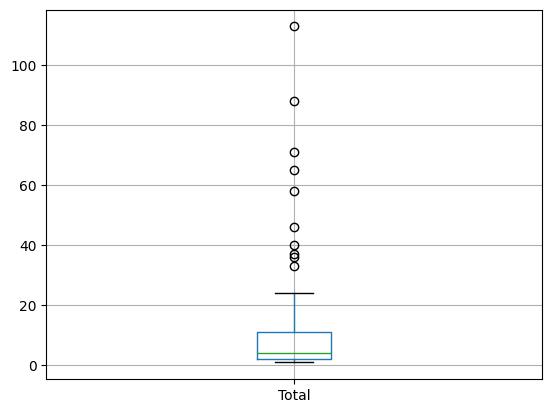

In [53]:
import matplotlib.pyplot as plt
medal_count.boxplot(column="Total", by=None,ax=None)
plt.show()

In [54]:
medal_count.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64